In [1]:
import pandas as pd
import numpy as np
import re
import random

import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
df = pd.read_csv('./data/21.01_대여소.csv')
df = df.fillna(0)
df.head()

,대여소\n번호,보관소(대여소)명,자치구,상세주소,Latitude,Longitude,위도,경도,설치\n시기,LCD,QR,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575327,126.973307,37.575794,126.971451,2015-10-07,16.0,0.0,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575327,126.973307,37.575947,126.974060,2015-10-07,12.0,0.0,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.569266,126.998190,37.571770,126.974663,2015-10-07,8.0,0.0,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.574034,126.976775,37.572113,126.977577,2021-01-26,0.0,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572811,126.979125,37.572582,126.978355,2015-10-07,16.0,0.0,LCD


# 지역구별 거치대 분포 분석

In [3]:
df['총거치대'] = df.apply(lambda x : x['LCD'] + x['QR'], axis = 1)
df.head()

,대여소\n번호,보관소(대여소)명,자치구,상세주소,Latitude,Longitude,위도,경도,설치\n시기,LCD,QR,운영\n방식,총거치대
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575327,126.973307,37.575794,126.971451,2015-10-07,16.0,0.0,LCD,16.0
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575327,126.973307,37.575947,126.974060,2015-10-07,12.0,0.0,LCD,12.0
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.569266,126.998190,37.571770,126.974663,2015-10-07,8.0,0.0,LCD,8.0
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.574034,126.976775,37.572113,126.977577,2021-01-26,0.0,7.0,QR,7.0
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572811,126.979125,37.572582,126.978355,2015-10-07,16.0,0.0,LCD,16.0


In [4]:
import geopandas as gpd
seoul = gpd.read_file('./data/seoul_sgg_stat.geojson')
seoul = seoul[['SGG_NM', 'geometry']].set_index('SGG_NM')
seoul.head()

,geometry
SGG_NM,
강남구,"POLYGON ((127.11880 37.47280, 127.11961 37.471..."
강동구,"POLYGON ((127.12874 37.52379, 127.11916 37.528..."
강북구,"POLYGON ((127.02998 37.61234, 127.02722 37.612..."
강서구,"POLYGON ((126.85669 37.57477, 126.85775 37.574..."
관악구,"POLYGON ((126.96848 37.44679, 126.96827 37.446..."


In [5]:
count_by_gu = df.groupby(['자치구'])['총거치대'].sum()
count_by_gu

자치구
강남구     1482.0
강동구     1152.0
강북구      676.0
강서구     2029.0
관악구      827.0
광진구     1029.0
구로구     1184.0
금천구      717.0
노원구     1131.0
도봉구      683.0
동대문구    1021.0
동작구      844.0
마포구     1310.0
서대문구    1015.0
서초구     1631.0
성동구      977.0
성북구      911.0
송파구     1770.0
양천구     1028.0
영등포구    1495.0
용산구      865.0
은평구      927.0
종로구     1168.0
중구       962.0
중랑구      830.0
Name: 총거치대, dtype: float64

In [6]:
def folium_choropleth(df_series):
    m = folium.Map(location = [37.5502, 126.982], tiles = 'cartodbpositron',
                    min_zoom = 10, max_zoom = 10)

    folium.Choropleth(geo_data = seoul.__geo_interface__,
            data = df_series, 
            key_on="feature.id",
            fill_color='YlGnBu', 
            legend_name='구별 따릉이현황'
            ).add_to(m)
    return m
folium_choropleth(count_by_gu)

In [7]:
count_by_gu = df.groupby(['자치구'])[['총거치대']].sum()
count_by_gu.head()

,총거치대
자치구,
강남구,1482.0
강동구,1152.0
강북구,676.0
강서구,2029.0
관악구,827.0


In [8]:
d = gpd.read_file('./data/seoul_sgg_stat.geojson')
d = d[['SGG_NM', 'TOTAL_POP']]
d = d.set_index('SGG_NM')
d.head()

,TOTAL_POP
SGG_NM,
강남구,561052
강동구,440359
강북구,328002
강서구,608255
관악구,520929


In [9]:
count_by_pop = pd.merge(count_by_gu, d, left_index=True, right_index=True)
count_by_pop.head()

,총거치대,TOTAL_POP
자치구,,
강남구,1482.0,561052
강동구,1152.0,440359
강북구,676.0,328002
강서구,2029.0,608255
관악구,827.0,520929


In [10]:
count_by_pop.columns

Index(['총거치대', 'TOTAL_POP'], dtype='object')

In [11]:
count_by_pop['인구대비거치대'] = count_by_pop.apply(lambda x : x['총거치대'] / x['TOTAL_POP'] * 10000, axis = 1)
count_by_pop.head()

,총거치대,TOTAL_POP,인구대비거치대
자치구,,,
강남구,1482.0,561052,26.414664
강동구,1152.0,440359,26.160474
강북구,676.0,328002,20.609630
강서구,2029.0,608255,33.357720
관악구,827.0,520929,15.875484


In [12]:
data_pop = count_by_pop['인구대비거치대']
folium_choropleth(data_pop)

In [13]:
count_by_pop.sort_values('총거치대', ascending = False).head(10)

,총거치대,TOTAL_POP,인구대비거치대
자치구,,,
강서구,2029.0,608255,33.357720
송파구,1770.0,671173,26.371740
서초구,1631.0,445401,36.618687
영등포구,1495.0,402024,37.186835
강남구,1482.0,561052,26.414664
마포구,1310.0,385783,33.956914
구로구,1184.0,441559,26.814084
종로구,1168.0,164257,71.108081
강동구,1152.0,440359,26.160474


In [14]:
count_by_pop.sort_values('인구대비거치대', ascending = False).head(10)

,총거치대,TOTAL_POP,인구대비거치대
자치구,,,
중구,962.0,134593,71.474742
종로구,1168.0,164257,71.108081
영등포구,1495.0,402024,37.186835
서초구,1631.0,445401,36.618687
용산구,865.0,244444,35.386428
마포구,1310.0,385783,33.956914
강서구,2029.0,608255,33.357720
성동구,977.0,312711,31.242905
서대문구,1015.0,325028,31.228079


## 분석결과
- 강서, 강남 3구(강남, 서초, 송파), 영등포 지역에 편중
- 중구, 종로의 경우 거주인구에 비해 과다한 거치대 설치됨

In [15]:
data = pd.read_csv('./data/21.01_이용내역.csv', encoding = 'CP949')
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134


In [16]:
df.head(1)

,대여소\n번호,보관소(대여소)명,자치구,상세주소,Latitude,Longitude,위도,경도,설치\n시기,LCD,QR,운영\n방식,총거치대
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575327,126.973307,37.575794,126.971451,2015-10-07,16.0,0.0,LCD,16.0


In [17]:
t_data = pd.merge(data, df, left_on = '대여소번호', right_on = '대여소\n번호', how = 'left')
t_data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),...,상세주소,Latitude,Longitude,위도,경도,설치\n시기,LCD,QR,운영\n방식,총거치대
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
t_data.isnull().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별           8800
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리(M)         0
이용시간(분)         0
대여소\n번호        59
보관소(대여소)명      59
자치구            59
상세주소           59
Latitude       59
Longitude      59
위도             59
경도             59
설치\n시기         59
LCD            59
QR             59
운영\n방식         59
총거치대           59
dtype: int64

In [19]:
print(len(t_data))
t_data =t_data.dropna()
print(len(t_data))

68795
59940


In [20]:
res2 = t_data.groupby('자치구')[['이용건수']].sum()
res2

,이용건수
자치구,
강남구,23822
강동구,24685
강북구,14749
강서구,65028
관악구,26195
광진구,36048
구로구,28899
금천구,12784
노원구,39610


In [21]:
res2 = pd.merge(count_by_pop, res2, left_index = True, right_index = True)
res2.head()

,총거치대,TOTAL_POP,인구대비거치대,이용건수
자치구,,,,
강남구,1482.0,561052,26.414664,23822
강동구,1152.0,440359,26.160474,24685
강북구,676.0,328002,20.609630,14749
강서구,2029.0,608255,33.357720,65028
관악구,827.0,520929,15.875484,26195


In [22]:
res2.sort_values('이용건수', ascending = False)

,총거치대,TOTAL_POP,인구대비거치대,이용건수
자치구,,,,
강서구,2029.0,608255,33.357720,65028
영등포구,1495.0,402024,37.186835,61413
송파구,1770.0,671173,26.371740,52390
마포구,1310.0,385783,33.956914,45773
양천구,1028.0,475018,21.641285,41202
노원구,1131.0,558075,20.266093,39610
광진구,1029.0,372298,27.639149,36048
성동구,977.0,312711,31.242905,34433
종로구,1168.0,164257,71.108081,33000


C:\Users\user\anaconda3\envs\ox\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\ox\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\ox\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\ox\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\ox\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\ox\lib\site-packages\matplotlib\backends\backend_agg.py:240: 

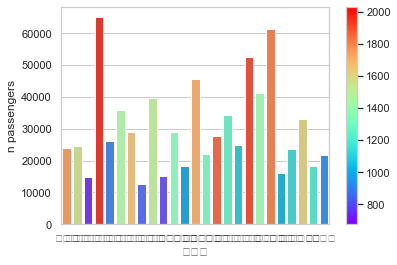

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

norm = plt.Normalize(res2['총거치대'].min(), res2['총거치대'].max())
sm = plt.cm.ScalarMappable(cmap="rainbow", norm=norm)
sm.set_array([])

ax = sns.barplot(x = res2.index, y = res2['이용건수'], 
                hue = res2['총거치대'], palette='rainbow', dodge=False)

ax.set_ylabel('n passengers')
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.show()

# res2 분석결과
- 강서, 영등포 및 강서 지역은 평균 이용량이 높음
- 강남, 서초는 설치된 거치대 개수에 비해 이용량 적음
- 성동구, 광진구, 양천구 등은 이용량 대비 설치개수 적음